# Python  TASK 4 (All exercises in one)
## Name- Jatin Karthik
## Matriculation no.-313301

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#### EXERCISE 0

In [2]:
#reading the.data file as csv
#Naming the columns

ttt=pd.read_csv("tic-tac-toe.data",delimiter=',')
ttt.columns=['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Classification']
ttt

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Classification
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


***1. Convert any non-numeric values to numeric values. For example you can replace a country name
with an integer value or more appropriately use hot-one encoding. [Hint: use hashmap (dict) or
pandas.get_dummies]. Please explain your solution.***

In [3]:

#Function to encode the non numeric columns

def encode_and_bind(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[[feature_to_encode]])
    original_df = pd.concat([original_df, dummies], axis=1)
    return(original_df)

A1=encode_and_bind(ttt, 'top-left-square')
A2=encode_and_bind(A1, 'top-middle-square')
A3=encode_and_bind(A2, 'top-right-square')
A4=encode_and_bind(A3, 'middle-left-square')
A5=encode_and_bind(A4, 'middle-middle-square')
A6=encode_and_bind(A5, 'middle-right-square')
A7=encode_and_bind(A6, 'bottom-left-square')
A8=encode_and_bind(A7, 'bottom-middle-square')
A9=encode_and_bind(A8, 'bottom-right-square')

#Make classification as a numerical positive or negative
A9.loc[A9['Classification'] == 'positive', 'Classification_num'] = '1'
A9.loc[A9['Classification'] == 'negative', 'Classification_num'] = '0'
A9=A9.drop(['Classification'],axis=1)
A9

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,top-left-square_b,...,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Classification_num
0,x,x,x,x,o,o,o,x,o,0,...,0,1,0,0,0,1,0,1,0,1
1,x,x,x,x,o,o,o,o,x,0,...,0,1,0,0,1,0,0,0,1,1
2,x,x,x,x,o,o,o,b,b,0,...,0,1,0,1,0,0,1,0,0,1
3,x,x,x,x,o,o,b,o,b,0,...,1,0,0,0,1,0,1,0,0,1
4,x,x,x,x,o,o,b,b,o,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,0,...,0,1,0,0,0,1,0,0,1,0
953,o,x,o,x,x,o,x,o,x,0,...,0,0,1,0,1,0,0,0,1,0
954,o,x,o,x,o,x,x,o,x,0,...,0,0,1,0,1,0,0,0,1,0
955,o,x,o,o,x,x,x,o,x,0,...,0,0,1,0,1,0,0,0,1,0


Explaination:- I used pd.getdummies here to have a substitute column for each of the pre-existing non-numeric columns. This is done becuae the classification algorithm cannot interpret the non-numeric(in this case x,o and b) as it is. pd.getdummies helps us to create a 3 subsequent columns for each column (becuase 3 possible values exist) consisting of subsequent 1's wherever the class has that specific value come up.

Since each row represents one whole tic-tac-toe game with three possibilities , so there will be 3x9=27 new columns added when hot encoding is used.

**2. This dataset is unbalanced, (show how we can confirm this). Explain what is stratified sampling
and Implement a stratified sampler.**

In [4]:


P=((ttt['Classification']).value_counts()).value_counts()
P
#print(ttt[ttt.Classification == 'positive'])
#print(ttt[ttt.Classification == 'negative'])

625    1
332    1
Name: Classification, dtype: int64

This shows us that there are 625 positive classes and 332 negative ones, which clearly shows that the dataset is imbalanced 
because they dont have similar/equal number of classification results for the machine to learn both the classifications properly

Balanced Dataset:- If the number of positive values and negative values is approximately same. 

Unbalanced Dataset: — If there is the very high difference between the positive values and negative values.

Oversampling is when one class is randomly chosen more than the other one by a huge margin and that repetitive features are used from that class. Undersampling on the other hand is the opposite of oversampling.

In [5]:
#Making a df of only the numerical values by dropping the rest
final=A9.drop(['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square'],axis=1)
final

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Classification_num
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
953,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
954,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
955,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In statistical surveys, when subpopulations within an overall population vary, it could be advantageous to sample each subpopulation (stratum) independently. Stratification is the process of dividing members of the population into homogeneous subgroups before sampling. The strata should define a partition of the population. That is, it should be collectively exhaustive and mutually exclusive: every element in the population must be assigned to one and only one stratum. Then simple random sampling is applied within each stratum. The objective is to improve the precision of the sample by reducing sampling error. It can produce a weighted mean that has less variability than the arithmetic mean of a simple random sample of the population.
    

Source:- https://en.wikipedia.org/wiki/Stratified_sampling

In [6]:
#stratification 

final['Stratify'] = final['Classification_num'] 
(final['Stratify'].value_counts() / len(final)).sort_values(ascending=False)

#As we can see there is huge difference in the proportions of positive and negative classes

1    0.653083
0    0.346917
Name: Stratify, dtype: float64

Stratification by simply using groupby attribute w.r.t the target column and sampling it by fraction

In [111]:
final.groupby('Classification_num', group_keys=True).apply(lambda x: x.sample(frac=0.5,random_state=3116))

top-left-square_b  top-left-square_o  \
Classification_num                                             
0                  943                  0                  0   
                   927                  1                  0   
                   774                  0                  1   
                   826                  0                  1   
                   852                  0                  1   
...                                   ...                ...   
1                  485                  1                  0   
                   409                  0                  1   
                   3                    0                  0   
                   576                  1                  0   
                   336                  0                  1   

                        top-left-square_x  top-middle-square_b  \
Classification_num                                               
0                  943                  1                    0   
                   927                  0                    1   
                   774                  0                    0   
                   826                  0                    0   
                   852                  0                    1   
...                                   ...                  ...   
1                  485                  0                    0   
                   409                  0                    0   
                   3                    1                    0   
                   576                  0                    0   
                   336                  0                    0   

                        top-middle-square_o  top-middle-square_x  \
Classification_num                                                 
0                  943                    0                    1   
                   927                    0                    0   
                   774                    0                    1   
                   826                    1                    0   
                   852                    0                    0   
...                                     ...                  ...   
1                  485                    0                    1   
                   409                    1                    0   
                   3                      0                    1   
                   576                    1                    0   
                   336                    0                    1   

                        top-right-square_b  top-right-square_o  \
Classification_num                                               
0                  943                   0                   1   
                   927                   0                   0   
                   774                   0                   1   
                   826                   0                   1   
                   852                   0                   0   
...                                    ...                 ...   
1                  485                   0                   0   
                   409                   1                   0   
                   3                     0                   0   
                   576                   1                   0   
                   336                   0                   1   

                        top-right-square_x  middle-left-square_b  ...  \
Classification_num                                                ...   
0                  943                   0                     0  ...   
                   927                   1                     0  ...   
                   774                   0                     0  ...   
                   826                   0                     0  ...   
                   852                   1                     0  ...   
...                                    ...                   ...  ...   
1   

---------------------------------------------------OR--------------------------------------------------------------------------

In [8]:
def stratify_data(df_data, stratify_column_name, stratify_values, stratify_proportions, random_state=None):
   
    df_stratified = pd.DataFrame(columns = df_data.columns) # Create an empty DataFrame with columns

    pos = -1
    for i in range(len(stratify_values)): # iterate over the stratify values 
        pos += 1
        if pos == len(stratify_values) - 1: 
            ratio_len = len(df_data) - len(df_stratified) 
        else:
            ratio_len = int(len(df_data) * stratify_proportions[i]) # Calculate the number of rows to match the desired proportion

        df_filtered = df_data[df_data[stratify_column_name] ==stratify_values[i]] # Filter the source data based on the currently selected stratify value
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state) # Sample the filtered data using the calculated ratio
        
        df_stratified = pd.concat([df_stratified, df_temp]) # Add the sampled / stratified datasets together to produce the final result
        
    return df_stratified    

The above code is referenced from the references mentioned in the end, but I have used the group by notation.

In [9]:
#stratify_values = ['positive', 'negative']
stratify_values = ['1', '0']
stratify_proportions = [0.50, 0.50]
stratified = stratify_data(final, 'Stratify', stratify_values, stratify_proportions, random_state=3116)
stratified

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Classification_num,Stratify
274,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,1
290,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,1
12,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,1
219,0,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,1,1
379,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
641,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
908,1,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
945,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [10]:

stratified.shape, final.shape
#P=((stratified['Stratify']).value_counts()).value_counts()
P=((stratified['Stratify']).value_counts()).value_counts()

# Target vector y i.e Y_train
y=stratified.iloc[:766,28:]

#target test vector y_test
y_t=stratified.iloc[766:,28:]
st=stratified['Stratify']
P

479    1
478    1
Name: Stratify, dtype: int64

In [11]:
stratified=stratified.drop(['Classification_num','Stratify'],axis=1)
stratified

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
274,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
290,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
12,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
219,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
379,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
641,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
908,1,0,0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
945,0,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0


**3. Split the data into a train(80%) and test(20%).**

In [12]:
training_data = stratified.sample(frac=0.8, random_state=3116)   #80% Train
#testing_data = stratified.drop(training_data.index)          #20% test
testing_data = stratified.sample(frac=0.2,random_state=3116)

print(f"No. of training examples:{training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

X=np.array(training_data, dtype=int)
Xtest=np.array(testing_data,dtype=int)

y=np.array(y,dtype=int)
ytest=np.array(y_t,dtype=int)
print(np.shape(ytest))

No. of training examples:766
No. of testing examples: 191
(191, 1)


**Exercise 1: Logistic Regression with Gradient Descent**

In [13]:
#defining the sigmoid function

def sigmoid(f):
    s= 1/(1+np.exp((-1)*f))
    return s

In [56]:
def minimise_GA(X, y, Xtest,ytest,mu,iterations,e):
    
    (m, n) = np.shape(X)


    loss_history = [0] * iterations   #absolute loss history list
    log_history = [0] * iterations    #log loss history list
    loss_history2 = [0]*iterations
    B=np.zeros([27,1], dtype=int)
    B2=np.zeros([27,1], dtype=int)
    y_hat=X.dot(B)
    y_hat2=X.dot(B2)
    l=np.sum((y.T).dot(y_hat) - np.log(1+np.exp(y_hat)))  #L_cond defined in slides
    #l=np.sum((y.T).dot(y_hat2) - np.log(1+np.exp(y_hat2)))
    
    # Two loops to run because we are implementing SGD where epochs are run
    for iteration in range(iterations):

        y_cap=sigmoid(y_hat)
        y_cap2=sigmoid(X.dot(B2))
        
        for j in range(m):
        
            error=y-y_cap
            gradient=(np.dot(X.T,error))
             
            B =B +  mu*gradient
            B2=B2 - mu*gradient
        
        #l=np.sum((y.T).dot(X.dot(B)) - np.log(1+np.exp(y_hat)))
        l_old=l
        l=np.sum((y.T).dot(X.dot(B)) - np.log(1+np.exp(y_hat)))
        
        #l_old=np.sum((y.T).dot(X.dot(B2)) - np.log(1+np.exp(y_hat2)))
        mu=steplength_bolddriver(l,l_old)
        
        y_cap2=sigmoid(X.dot(B2))
        
        loss=Abs_loss(y_cap,y_cap2)
        loss2=Abs_loss(l_old,l)
        loss_history[iteration]=loss
        loss_history2[iteration]=loss2
        
        z= Xtest.dot(B)
        y_pred=sigmoid(z)
        #print(ytest)
        log_loss=logloss(ytest,y_pred)
        log_history[iteration]=log_loss
        
        #if (l-l_old<e):
            
    return B,loss_history,loss_history2,log_history
    

In [128]:

def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    log_loss = -(((y_true * np.log(y_pred)) + (1-y_true) * np.log(1-y_pred)).mean())
    
    return log_loss

In [65]:
def Abs_loss(l_old,l):  # Function for absolute loss i.e |f(x-i)-f(x)|
    J=(np.absolute(l_old-l)).mean()
    return J
    

In [83]:
def steplength_bolddriver(ll_old,ll_new,mu_old=0.000001, mu_plus=0.5,mu_minus=0.001):
    if (ll_old-ll_new)<=0:
        mu_n=mu_old*mu_minus
    #mu_n=mu_old*mu_plus
    else:
        mu_n=mu_old*mu_plus
        
    #while(fun_x(X,y) + f_grad_sbd(mu_n) <= 0):
          #mu_n=mu_n*mu_minus
        
    return mu_n

#sbd_mu=steplength_bolddriver(X,y,mu_old=0.000001)
#print("The mu value which we get from stepsize bolddriver is",sbd_mu)
#beta,loss_hist= minimise_GA(X,y, sbd_mu , iterations=100, e=1e-3)





**You will use bolddriver as the step length controller.
– In each iteration of the algorithm calculate |f(xi−1) − f(xi)| and at the end of learning, plot it
against iteration number i. Explain the graph.
– In each iteration step also calculate logloss on test set (see ref:https://www.kaggle.
com/wiki/LogarithmicLoss), plot it against iteration number i. Explain the graph.**

Text(0.5, 1.0, '|y(i)-y(i-1)|')

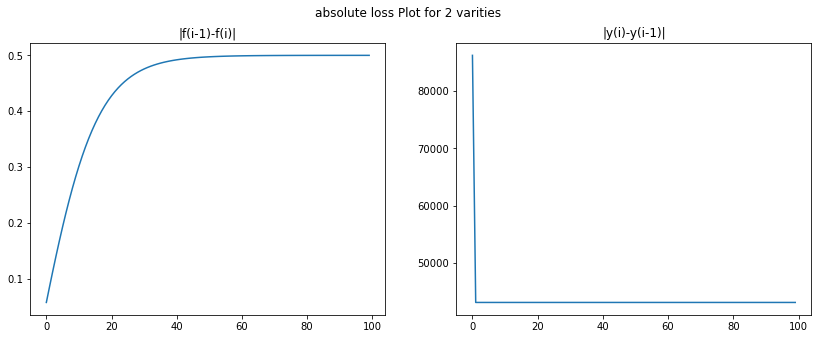

In [85]:
w,loss_hist1,loss_hist2,ll_hist= minimise_GA(X,y, Xtest,ytest,mu=0.000001, iterations=100, e=1e-1)
#print(ll_hist)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,5))
fig.suptitle('absolute loss Plot for 2 varities')
ax1.plot(list(range(100)),loss_hist1)
ax1.set_title('|f(i-1)-f(i)|')
ax2.plot(list(range(100)),loss_hist2)
ax2.set_title('|y(i)-y(i-1)|')

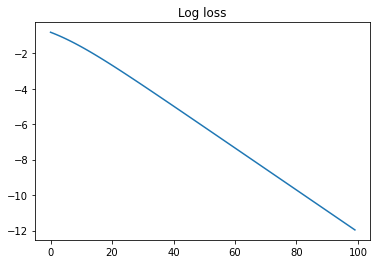

In [86]:
plt.title("Log loss")
plt.plot(list(range(100)),ll_hist)

Explaination:- For Gradient Ascent, is used for finding the maximum point and here, we were asked to plot absolute loss of two previous iterations. As we can see the y(i) i.e the Lcond given in slides decreases rapidly within an iteration which means the GA has very less difference between its iterations. About the 2nd graph which is |f(i-1)-f(i)|, this is the predicted value difference of every iteration of beta. In my view, this graph hasd to decrease ith no. of iterations but I think the difference is 0.5 where it saturates and that is not that big. Talking aboout Log loss, the ideal log loss for Logistic regression GA is the one where the log likelihood increases, so the log loss should automatically decrease which is what is happening but the trend differs with different values of alpha, alpha_plus and minus i.e is the step used.

### Exercise 2: Implement Newton Algorithm for Logistic Regression



βˆ(t):= βˆ(t−1) + µ((X.T)WX)^−1 (X.T(y − ˆy))
This is the matrix form which I have used to build this function from Prof Lars slides as given

In [129]:
def newton(X,y,Xtest,ytest,theta,mu,iterations):
        
        losses = [0] * iterations
        log_his= [0] * iterations
        losses2= [0] * iterations
        l=np.sum((y.T).dot(X.dot(theta)) - np.log(1+np.exp(np.dot(X,theta))))
        for iterations in range(iterations):
            
            z = np.dot(X, theta)
            p = sigmoid(z)
        
            W = np.diag(p * (1 - p))
            #print((W))
            hessian = ((X.T)*(W)).dot(X)

            gradient = np.dot(X.T, (y-p));  # 1st derivative of log likelihood wrt parameters.

            
            step = np.dot(np.linalg.inv(hessian), gradient)
              
                ## update the weights
            y_cap=Xtest.dot(theta)    
            theta = theta + mu*step
            l_old=l
            
            l=np.sum((y.T).dot(X.dot(theta)) - np.log(1+np.exp(z)))
            
            y_cap2=Xtest.dot(theta)
            loss=Abs_loss(y_cap,y_cap2)
            losses2[iterations]=loss
            
            
            
            los=Abs_loss(l_old,l)
            #print(l_old,l)
            losses[iterations]=los
            
            p= Xtest.dot(theta)
            y_pred=sigmoid(p)
            #print(ytest)        
            log_los=logloss(ytest,y_pred)         #Log loss performed on test dataset
            log_his[iterations]=log_los
            
        return theta,losses, losses2, log_his



Text(0.5, 1.0, 'Log loss')

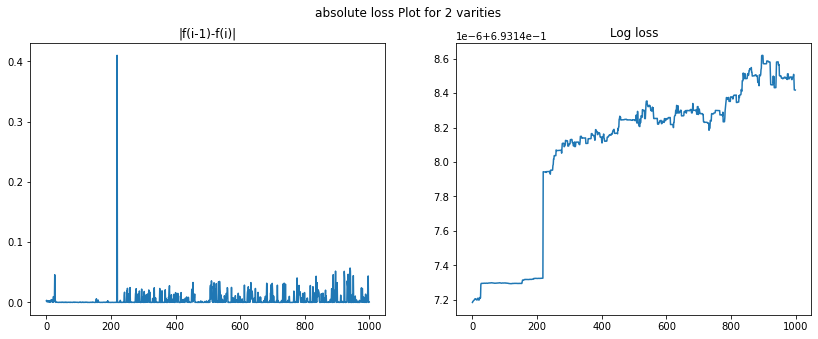

In [137]:
B=np.zeros([27,1],dtype=int)
t,abs_hist1,abs_hist2,ll_hist=newton(X,y,Xtest,ytest,B,mu=1e-9,iterations=1000)


fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(14,5))
fig.suptitle('absolute loss Plot for 2 varities')
ax3.plot(list(range(1000)),abs_hist1)
ax3.set_title('|f(i-1)-f(i)|')
ax4.plot(list(range(1000)),ll_hist)
ax4.set_title('Log loss')

Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

The above statement gives us a clear understanding of what log loss graph tells us exactly. So,as we can see in the graph, the values are in the range of 8 e-6, which is fairlly very small and it should actually become way closer to 0 with more iterations but here since the inital value of alpha is debatable, the graph is not closing in on the prediction probability.

Explainations:- For Newton optimisation technique, its very important to choose a right initial value and have a smooth function i.e f'(x)=0 but if these conditions are not fulfilled, the graphs come out to be very diverging. As we can see the absolute loss function is jumping and the difference between consecutive values exists in the initial iterations and then the loss trend decreases down to almost 0. So, Newton optimisation is not reliable always but only when the initial point is near the critical point is when it functions. Talking about the convergence rate, it is fairly fast depending on the initial value which is assumed. As the diff

References:-

https://towardsdatascience.com/stratified-random-sampling-using-python-and-pandas-1c84f0362ebc
https://beckernick.github.io/logistic-regression-from-scratch/
https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/
https://towardsdatascience.com/ml-estimation-gaussian-model-and-linear-discriminant-analysis-92d93f185818
https://medium.com/@papillonbee/logistic-regression-from-scratch-with-gradient-descent-and-newtons-method-ff4307e3cb30
https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11
